In [ ]:
# rich-club-innovation.ipynb
#
# Bryan Daniels
# 5.16.2018
#
# Do more innovative papers appear at the periphery of bibliographic networks?
#
# NOTE: FOR NEWEST FIGURES, SEE paper-figures-rich-club-innovation.ipynb

In [1]:
%matplotlib inline
import pylab
import toolbox.defaultFigure as defaultFigure
defaultFigure.setDefaultParams()

In [2]:
import pandas as pd
import numpy as np

In [51]:
def degrees(coupling):
    """
    Given coupling dataframe, return series of degrees.
    
    Edges are currently defined as sharing a nonzero number of references.
    (We throw away information about the number of shared references.)
    """
    return (coupling>0).sum(axis=1)

In [52]:
def couplingSum(coupling):
    return coupling.sum(axis=1)

In [5]:
def richClubNodes(degreeList,K):
    return np.where( degreeList >= K )[0]

In [6]:
def richClubCoupling(coupling,K,degreeList=None):
    if degreeList is None: degreeList = degrees(coupling)
    r = richClubNodes(degreeList,K)
    return np.nan_to_num(np.array(coupling)[r][:,r])

In [7]:
def richClubNumEdges(coupling,K,degreeList=None):
    richCoupling = richClubCoupling(coupling,K,degreeList)
    return np.sum(richCoupling>0)

In [8]:
def expectedRichClubNumEdges(coupling,K,degreeList=None):
    """
    See notes 5/17/2018
    """
    if degreeList is None: degreeList = degrees(coupling)
    Nrich = float(len(richClubNodes(degreeList,K)))
    meanKrich = richClubNumEdges(coupling,K) / Nrich
    
    N = len(coupling)
    meanK = np.mean(degreeList)
    
    print "Nrich,meanKrich =",Nrich,meanKrich
    print "N,meanK =",N,meanK
    
    return (Nrich*meanKrich)**2 / (N*meanK)

In [9]:
def rho_unc(coupling,K,degreeList=None):
    """
    Rich club ratio as defined in ColFlaSer06, equal to the ratio of
    the number of edges in the rich club and the expected number of
    edges in the rich club given randomly assigned edges.
    
    Note that this does not hold the degree distribution constant,
    only the number of edges.
    """
    if degreeList is None: degreeList = degrees(coupling)
    return richClubNumEdges(coupling,K,degreeList) / expectedRichClubNumEdges(coupling,K,degreeList)

In [10]:
def cdfPlot(allvalues,innovativevalues,samples=100):
    """
    samples (100)         : if given a number of samples,
                            also plot 90% confidence intervals 
                            corresponding to randomly choosing 
                            a subset of allvalues with same
                            length as innovativevalues
    """
    sortedvals = np.sort(allvalues)
    Fvals = (np.array(range(len(sortedvals)))+1)/float(len(sortedvals))

    sortedinnovativevals = np.sort(innovativevalues)
    Finnovativevals = (np.array(range(len(sortedinnovativevals)))+1)/float(len(sortedinnovativevals))
    
    if samples > 0:
        FrandomvalsAllList = []
        for i in range(samples):
            randomindices = np.random.choice(range(len(allvalues)),len(innovativevalues),replace=False)
            #Frandomvals = (np.array(range(len(randomvals)))+1)/float(len(randomvals))
            F = 0.
            FrandomvalsAll = []
            # the y-value for all unobserved points should be equal to the y-value of the closest
            # point with smaller x-value
            for idx in range(len(sortedvals)):
                if idx in randomindices:
                    F += 1./len(randomindices)
                FrandomvalsAll.append(F)
            FrandomvalsAllList.append(FrandomvalsAll)
        defaultFigure.prettyConfInt(pylab.gca(),
               sortedvals,
               np.median(FrandomvalsAllList,axis=0),
               np.percentile(FrandomvalsAllList,5,axis=0),
               np.percentile(FrandomvalsAllList,95,axis=0),color='C0')    
    
    pylab.plot(sortedvals,Fvals,label='all papers')
    pylab.plot(sortedinnovativevals,Finnovativevals,label='innovative papers')
    pylab.legend()
    pylab.axis(ymin=0,ymax=1)
    pylab.ylabel('Cumulative distribution function')
    pylab.subplots_adjust(bottom=0.15)

# load data

In [11]:
# bibliographic coupling over all years
coupling = pd.read_excel('Data/180426/Bibliographic_Coupling_Matrix.xlsx')

In [12]:
coupling.head()

,1,2,3,4,5,6,7,8,9,10,...,6447,6448,6449,6450,6451,6452,6453,6454,6455,6456
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
coupling.shape

(6456, 6456)

In [14]:
len(richClubNodes(coupling,400))

0

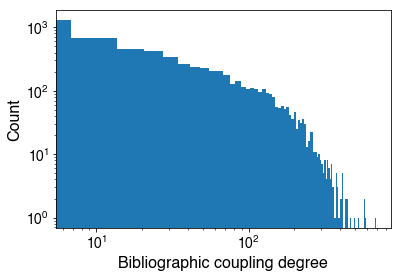

In [32]:
pylab.hist(degrees(coupling),bins=100,log=True);
pylab.xlabel('Bibliographic coupling degree')
pylab.ylabel('Count')
pylab.xscale('log')

In [15]:
# 6.7.2018 get years for all papers.  
paperData = pd.read_excel('Data/180426/Bibliographic_Coupling_Matrix.xlsx',1)
paperData['Year'] = paperData['Title'].apply(lambda t: int(t[-5:-1]))
paperData.set_index('Name',inplace=True)

In [16]:
paperData.loc[5260:5274]

,Title,x-coordinate,y-coordinate,Year
Name,,,,
5260,nijhout (1979),-0.6356,-0.0792,1979
5261,nijhout (1978),-0.6336,-0.0784,1978
5262,nijhout (1978),-0.6332,-0.1338,1978
5263,nijhout (1978),-0.6332,-0.0751,1978
5264,nijhout (1977),-0.6344,-0.0792,1977
5265,nijhout (1976),-0.6409,-0.0595,1976
5266,nijhout (1975),-0.6444,-0.0576,1975
5267,nijhout (1975),-0.6345,-0.0586,1975
5268,nijhout (1975),-0.6197,-0.0570,1975


In [17]:
# these are the years we've got
years = np.sort(paperData['Year'].unique())
print years

[1971 1973 1974 1975 1976 1977 1978 1979 1980 1981 1982 1983 1984 1985
 1986 1988 1989 1990 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002
 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016
 2017]


In [18]:
# calculate bibiographic coupling to papers published anytime before the same year
couplingByYear = {}
for year in years:
    papers = list( paperData[paperData['Year'] <= year].index )
    couplingByYear[year] = coupling.loc[papers,papers]

In [181]:
# 7.25.2018 also calculate bibiographic coupling to papers published anytime before two years later
couplingByYearPlus = {}
deltaTime = 2 #5 #2 # years
for year in years:
    papers = list( paperData[paperData['Year'] <= year ].index )
    papersPlus = list( paperData[paperData['Year'] <= year + deltaTime].index )
    couplingByYearPlus[year] = coupling.loc[papers,papersPlus]

In [40]:
couplingByYear[1975]

,5266,5267,5268,5269,5270,5271,5272,5273
5266,NaN,5.0,1.0,NaN,4.0,3.0,NaN,NaN
5267,5.0,NaN,1.0,NaN,2.0,5.0,NaN,NaN
5268,1.0,1.0,NaN,NaN,1.0,1.0,NaN,NaN
5269,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
5270,4.0,2.0,1.0,NaN,NaN,2.0,NaN,NaN
5271,3.0,5.0,1.0,NaN,2.0,NaN,NaN,NaN
5272,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5273,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN


In [41]:
couplingByYearPlus[1975]

,5264,5265,5266,5267,5268,5269,5270,5271,5272,5273
5266,NaN,6.0,NaN,5.0,1.0,NaN,4.0,3.0,NaN,NaN
5267,NaN,8.0,5.0,NaN,1.0,NaN,2.0,5.0,NaN,NaN
5268,NaN,1.0,1.0,1.0,NaN,NaN,1.0,1.0,NaN,NaN
5269,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
5270,NaN,3.0,4.0,2.0,1.0,NaN,NaN,2.0,NaN,NaN
5271,NaN,7.0,3.0,5.0,1.0,NaN,2.0,NaN,NaN,NaN
5272,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5273,3.0,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN


In [50]:
# example calculating the number of additional bibliographic coupling links gained
# by each paper published in 1975 in the two subsequent years
couplingByYearPlus[1975].sum(axis=1) - couplingByYear[1975].sum(axis=1)

5266    6.0
5267    8.0
5268    1.0
5269    2.0
5270    3.0
5271    7.0
5272    0.0
5273    3.0
dtype: float64

# 5.31.2018 check where Deryc's 50 "innovative" papers fall

In [166]:
# 50 innovative papers
#innovativeIDs = np.loadtxt('Data/180531/PaperIDs.txt',skiprows=1,dtype=int)
# 50 innovative papers that occur post-2006
rawdata = np.loadtxt('Data/180612/PaperIDs_post2006.txt',skiprows=1,dtype=str,delimiter=',')
rawdata = filter(lambda row: row != 'New',rawdata)
rawdata = [ row.split() for row in rawdata ]
innovativeIDs50 = np.array([row[0] for row in rawdata],dtype=int)
innovativeNames50 = [row[1]+" "+row[2] for row in rawdata]

In [167]:
# 7.25.2018
# 100 innovative papers
innovative100raw = pd.read_csv('Data/180621/InnovativePapers_Top100_Post2006.csv')
innovativeIDs100 = np.array(innovative100raw['ID numbers'])
innovativeNames100 = innovative100raw['First Author']
innovativeYears100 = innovative100raw['Year']

In [157]:
innovative100raw.head()

,ID numbers,First Author,Year
0,985,crimmins,2012
1,3505,eiazguirre,2012
2,4976,ruths,2012
3,3506,eizaguirre,2012
4,226,keller,2012


In [161]:
innovativeIDs[:10],innovativeIDs100[:10]

(array([ 985, 3505, 4976, 3506,  226, 2960, 5578, 5580, 5401, 6028]),
 array([ 985, 3505, 4976, 3506,  226, 2960, 5578, 5580, 5401, 6028]))

In [211]:
# choose the list of innovative papers to use
innovativeIDs = innovativeIDs100 # innovativeIDs50
innovativeNames = innovativeNames100 # innovativeNames50

In [212]:
innovativeIDsByYear = {}
innovativeNamesByYear = {}
for year in years:
    innovativeIDsByYear[year] = filter(lambda id: paperData['Year'][id] == year,innovativeIDs)
    innovativeIndices = filter(lambda idx: paperData['Year'][innovativeIDs[idx]] == year,range(len(innovativeIDs)))
    innovativeNamesByYear[year] = [ innovativeNames[idx] for idx in innovativeIndices ]

# double-check we have all of them
assert(len(innovativeIDs) == np.sum([len(ids) for ids in innovativeIDsByYear.values()]))

In [213]:
len(innovativeIDs)

100

In [214]:
np.sort(innovativeIDs)

array([  41,   69,   93,  107,  226,  237,  272,  274,  316,  399,  424,
        461,  527,  560,  854,  871,  872,  908,  914,  985,  989, 1075,
       1076, 1077, 1107, 1190, 1380, 1493, 1586, 1597, 1609, 1786, 1881,
       2057, 2058, 2094, 2096, 2124, 2172, 2174, 2178, 2208, 2229, 2270,
       2271, 2273, 2361, 2765, 2790, 2810, 2853, 2859, 2881, 2916, 2960,
       3087, 3088, 3089, 3269, 3277, 3372, 3373, 3419, 3420, 3505, 3506,
       3704, 3731, 3744, 3999, 4000, 4086, 4087, 4088, 4497, 4778, 4976,
       4990, 4991, 5052, 5083, 5090, 5156, 5385, 5401, 5407, 5408, 5409,
       5578, 5580, 5633, 5644, 5684, 5685, 5695, 5711, 5898, 6028, 6331,
       6426])

In [215]:
innovativeIDsByYear[2007]

[424, 1493, 4086, 4087, 4088, 274, 4000, 272, 237, 2057, 461, 6426, 2361, 2058]

In [216]:
innovativeNamesByYear[2007]

['thompson',
 'thompson',
 'martin',
 'martin',
 'martin',
 'bean',
 'rivero',
 'collins',
 'jani',
 'hausler',
 'culotta',
 'blaschke',
 'wilbur',
 'hausler']

In [217]:
paperData.loc[innovativeIDsByYear[2007]]

,Title,x-coordinate,y-coordinate,Year
Name,,,,
424,thompson (2007),-0.3446,-0.0862,2007
1493,thompson (2007),-0.2264,0.2531,2007
4086,martin (2007),3.6420,2.2837,2007
4087,martin (2007),-0.3149,-0.1601,2007
4088,martin (2007),-0.2475,0.0489,2007
274,bean (2007),4.2934,0.0934,2007
4000,rivero (2007),-0.3816,-0.6262,2007
272,collins (2007),2.0486,3.7905,2007
237,jani (2007),4.0092,-1.5449,2007


# 6.7.2018 calculate coupling networks separately by year

/Users/bryandaniels/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


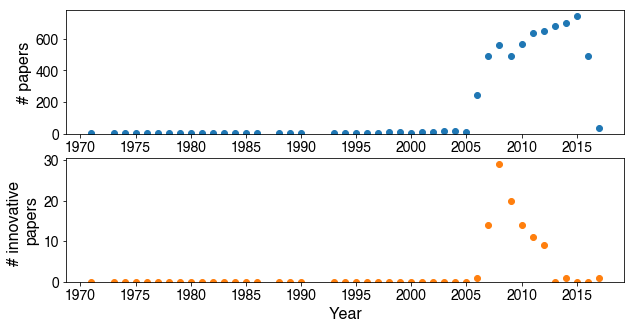

In [218]:
pylab.figure(figsize=(10,5))
years = np.sort(innovativeIDsByYear.keys())
pylab.subplot(211)
pylab.plot(years,[len(couplingByYear[y][paperData['Year']==y]) for y in years],'o')
#pylab.xlabel('Year')
pylab.ylabel('# papers')
pylab.xticks(range(1970,2017,5))
pylab.axis(ymin=0)
pylab.subplot(212)
pylab.plot(years,[len(innovativeIDsByYear[y]) for y in years],'o',color='C1')
pylab.xlabel('Year')
pylab.ylabel('# innovative \npapers')
pylab.xticks(range(1970,2017,5))
pylab.axis(ymin=0)
pylab.savefig('180725_num_papers_vs_time_numInnovative'+str(len(innovativeIDs))+'.pdf')

2007 number of new papers = 494
2007 number of innovative papers = 14
2008 number of new papers = 563
2008 number of innovative papers = 29
2009 number of new papers = 494
2009 number of innovative papers = 20
2010 number of new papers = 570
2010 number of innovative papers = 14
2011 number of new papers = 640
2011 number of innovative papers = 11
2012 number of new papers = 653
2012 number of innovative papers = 9
2013 number of new papers = 682
2013 number of innovative papers = 0
2014 number of new papers = 698
2014 number of innovative papers = 1


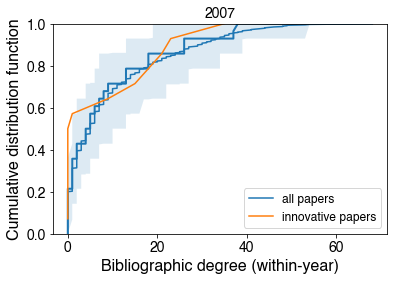

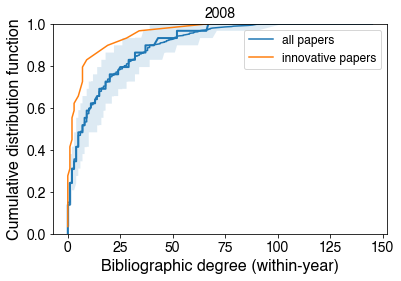

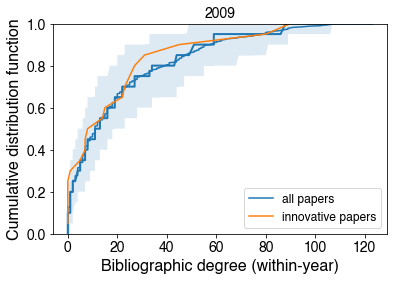

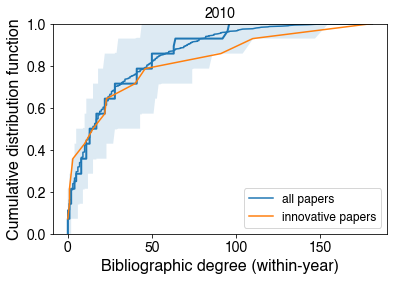

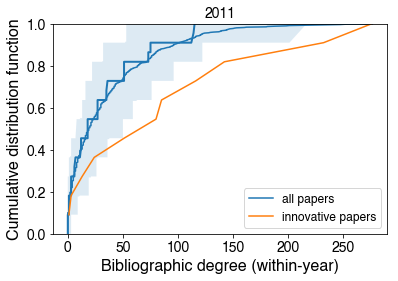

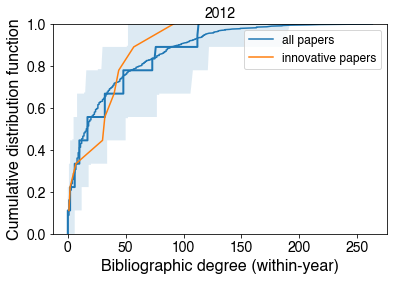

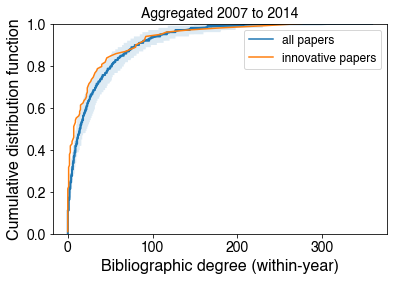

In [221]:
# separate cdf plots for each year
useWeightedEdges = False #True #False
aggregatedNewdegrees = []
aggregatedInnovativedegrees = []
if useWeightedEdges:
    xlabel = 'Bibliographic coupling sum (within-year)'
else:
    xlabel = 'Bibliographic degree (within-year)'
#for year in [2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016]:
for year in [2007,2008,2009,2010,2011,2012,2013,2014]:
    if useWeightedEdges:
        allnewdegrees = couplingSum(couplingByYear[year])[paperData['Year']==year]
    else:
        allnewdegrees = degrees(couplingByYear[year])[paperData['Year']==year]
    print year,"number of new papers =",len(allnewdegrees)
    innovativedegrees = allnewdegrees[innovativeIDsByYear[year]].dropna()
    aggregatedNewdegrees.extend(allnewdegrees)
    aggregatedInnovativedegrees.extend(innovativedegrees)
    if len(innovativedegrees)>1:
        pylab.figure()
        cdfPlot(allnewdegrees,innovativedegrees)
        pylab.title(year)
        pylab.xlabel(xlabel)
    print year,"number of innovative papers =",len(innovativedegrees)
    
pylab.figure()
cdfPlot(aggregatedNewdegrees,aggregatedInnovativedegrees)
pylab.title('Aggregated 2007 to 2014')
pylab.xlabel(xlabel)
#pylab.savefig('180614_cdf_bibliographic_degree_within_year.pdf')

In [210]:
# test significance with 2 sample ks-test
print "numInnovative =",len(aggregatedInnovativedegrees)
print ks_2samp(aggregatedNewdegrees,aggregatedInnovativedegrees)

numInnovative = 50
Ks_2sampResult(statistic=0.12843554443053817, pvalue=0.3645306702595963)


In [220]:
# test significance with 2 sample ks-test
print "numInnovative =",len(aggregatedInnovativedegrees)
print ks_2samp(aggregatedNewdegrees,aggregatedInnovativedegrees)

numInnovative = 98
Ks_2sampResult(statistic=0.1668028913693137, pvalue=0.008270715378308839)


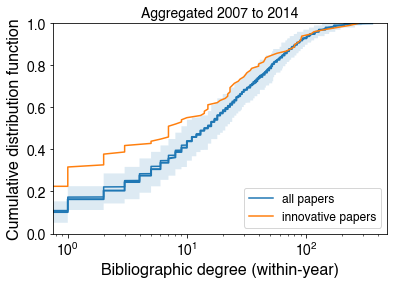

In [241]:
cdfPlot(aggregatedNewdegrees,aggregatedInnovativedegrees)
pylab.title('Aggregated 2007 to 2014')
pylab.xlabel(xlabel)
pylab.xscale('log')
pylab.savefig('180726_cdf_bibliographic_degree_within_year_numInnovative'+str(len(aggregatedInnovativedegrees))+'.pdf')

2007 number of new papers = 494
2007 number of innovative papers = 14
2008 number of new papers = 563
2008 number of innovative papers = 29
2009 number of new papers = 494
2009 number of innovative papers = 20
2010 number of new papers = 570
2010 number of innovative papers = 14
2011 number of new papers = 640
2011 number of innovative papers = 11
2012 number of new papers = 653
2012 number of innovative papers = 9
2013 number of new papers = 682
2013 number of innovative papers = 0
2014 number of new papers = 698
2014 number of innovative papers = 1


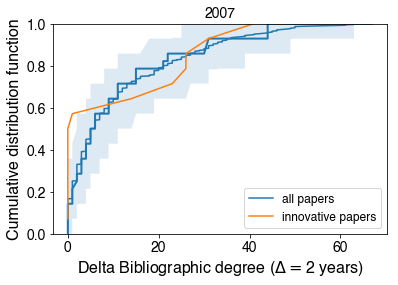

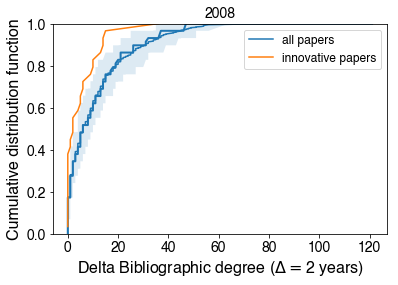

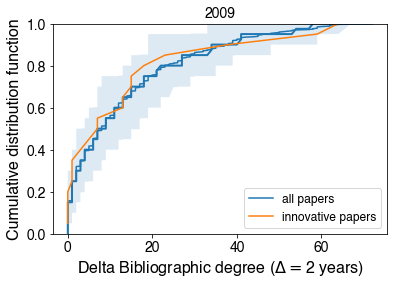

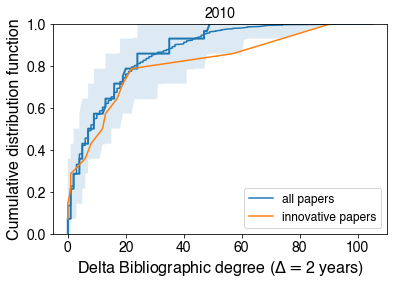

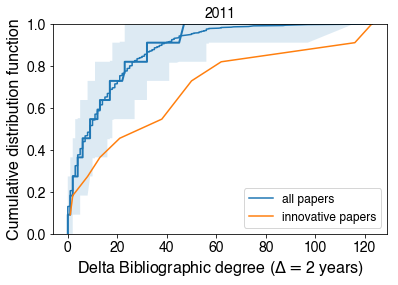

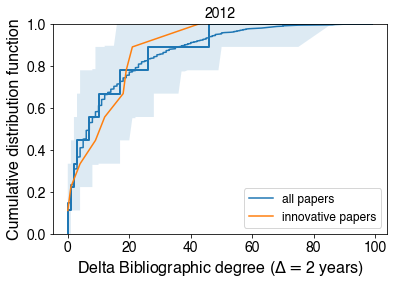

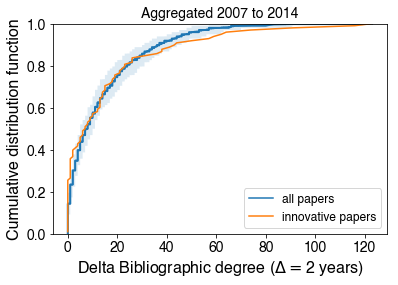

In [243]:
# 7.25.2018 distributions of "delta" coupling (number of new bibliographic coupling links)
useWeightedEdges = False #True #False
aggregatedNewdegreesDelta = []
aggregatedInnovativedegreesDelta = []
if useWeightedEdges:
    xlabel = 'Delta Bibliographic coupling sum ($\\Delta=$'+str(deltaTime)+' years)'
else:
    xlabel = 'Delta Bibliographic degree ($\\Delta=$'+str(deltaTime)+' years)'
for year in [2007,2008,2009,2010,2011,2012,2013,2014]:
    if useWeightedEdges:
        allnewdegrees = couplingSum(couplingByYear[year])[paperData['Year']==year]
        allnewdegreesPlus = couplingSum(couplingByYearPlus[year])[paperData['Year']==year]
    else:
        allnewdegrees = degrees(couplingByYear[year])[paperData['Year']==year]
        allnewdegreesPlus = degrees(couplingByYearPlus[year])[paperData['Year']==year]
    allnewdegreesDelta = allnewdegreesPlus - allnewdegrees
    print year,"number of new papers =",len(allnewdegrees)
    innovativedegreesDelta = allnewdegreesDelta[innovativeIDsByYear[year]].dropna()
    aggregatedNewdegreesDelta.extend(allnewdegreesDelta)
    aggregatedInnovativedegreesDelta.extend(innovativedegreesDelta)
    if len(innovativedegreesDelta)>1:
        pylab.figure()
        cdfPlot(allnewdegreesDelta,innovativedegreesDelta)
        pylab.title(year)
        pylab.xlabel(xlabel)
    print year,"number of innovative papers =",len(innovativedegreesDelta)
    
pylab.figure()
cdfPlot(aggregatedNewdegreesDelta,aggregatedInnovativedegreesDelta)
pylab.title('Aggregated 2007 to 2014')
pylab.xlabel(xlabel)
#pylab.savefig('180614_cdf_bibliographic_degree_within_year.pdf')

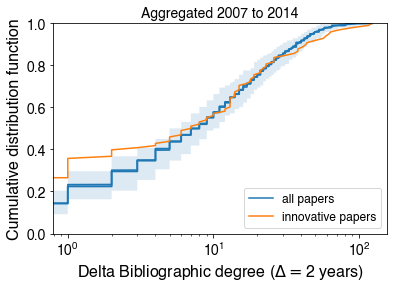

In [247]:
cdfPlot(aggregatedNewdegreesDelta,aggregatedInnovativedegreesDelta)
pylab.title('Aggregated 2007 to 2014')
pylab.xlabel(xlabel)
pylab.xscale('log')
pylab.savefig('180726_delta_bibliographic_degree_numInnovative'+str(len(aggregatedInnovativedegreesDelta))+'.pdf')

In [242]:
ks_2samp(aggregatedNewdegreesDelta,aggregatedInnovativedegreesDelta)

Ks_2sampResult(statistic=0.12435186840693724, pvalue=0.09469043623296022)

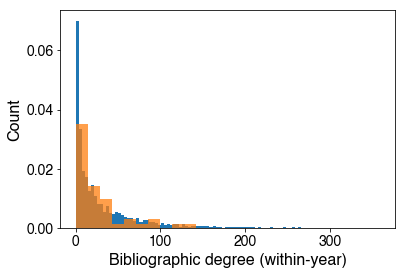

In [537]:
pylab.hist(aggregatedNewdegrees,bins=100,log=False,normed=True);
pylab.hist(aggregatedInnovativedegrees,normed=True,alpha=0.75)
pylab.xlabel(xlabel)
pylab.ylabel('Count')

# 6.18.2018 do measures of centrality fare better?

In [76]:
import networkx as nx

In [31]:
yearG = nx.from_pandas_adjacency(couplingByYear[2017]>0)
maxk = 10
b = nx.betweenness_centrality(yearG,k=min(maxk,len(yearG)))
newIds = paperData[paperData['Year']==year].index
bNew = pd.Series([b[idx] for idx in newIds],newIds)

2007 number of new papers = 494
2007 number of innovative papers = 14
2008 number of new papers = 563
2008 number of innovative papers = 29
2009 number of new papers = 494
2009 number of innovative papers = 20
2010 number of new papers = 570
2010 number of innovative papers = 14
2011 number of new papers = 640
2011 number of innovative papers = 11
2012 number of new papers = 653
2012 number of innovative papers = 9
2013 number of new papers = 682
2013 number of innovative papers = 0
2014 number of new papers = 698
2014 number of innovative papers = 1


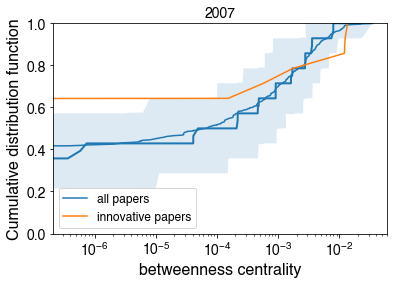

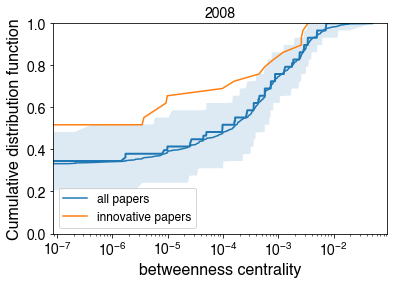

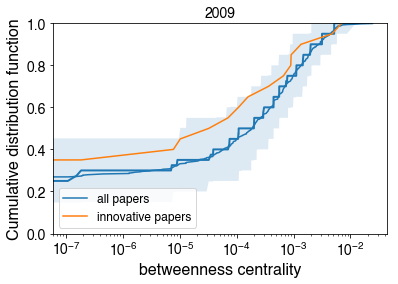

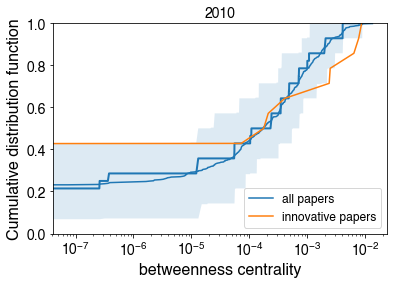

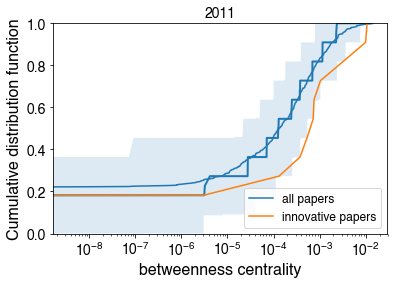

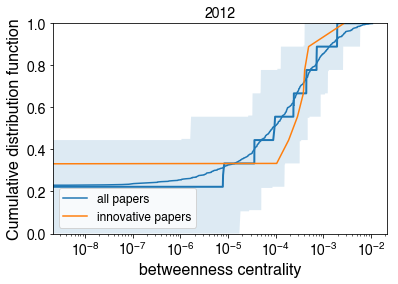

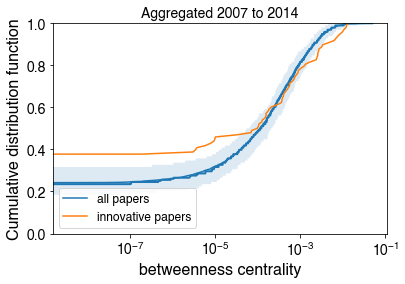

In [252]:
maxk = 400 #200 #50 # maximum number of nodes to test in measure of betweenness centrality
aggregatedNewBw,aggregatedInnovativeBw = [],[]
xlabel = 'betweenness centrality'
for year in [2007,2008,2009,2010,2011,2012,2013,2014]:
    yearG = nx.from_pandas_adjacency(couplingByYear[year]>0)
    bw = nx.betweenness_centrality(yearG,k=min(maxk,len(yearG)),normalized=True)
    newIds = paperData[paperData['Year']==year].index
    bwNew = pd.Series([bw[idx] for idx in newIds],newIds)
    print year,"number of new papers =",len(bwNew)
    innovativeBw = bwNew[innovativeIDsByYear[year]].dropna()
    aggregatedNewBw.extend(bwNew)
    aggregatedInnovativeBw.extend(innovativeBw)
    if len(innovativeBw)>1:
        pylab.figure()
        cdfPlot(bwNew,innovativeBw)
        pylab.title(year)
        pylab.xlabel(xlabel)
        pylab.xscale('log')
    print year,"number of innovative papers =",len(innovativeBw)
    
pylab.figure()
cdfPlot(aggregatedNewBw,aggregatedInnovativeBw)
pylab.title('Aggregated 2007 to 2014')
pylab.xlabel(xlabel)
pylab.xscale('log')

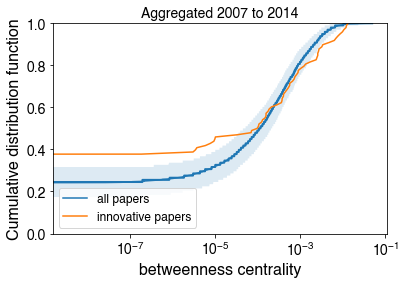

In [253]:
cdfPlot(aggregatedNewBw,aggregatedInnovativeBw,samples=1000)
pylab.title('Aggregated 2007 to 2014')
pylab.xlabel('betweenness centrality')
pylab.xscale('log')
pylab.savefig('180725_betweenness_maxk'+str(maxk)\
              +'_numInnovative'+str(len(aggregatedInnovativeBw))+'.pdf')

In [235]:
# test significance with 2 sample ks-test
print "numInnovative =",len(aggregatedInnovativeBw)
print "maxk =",maxk
print ks_2samp(aggregatedNewBw,aggregatedInnovativeBw)

numInnovative = 98
maxk = 200
Ks_2sampResult(statistic=0.13287016934433346, pvalue=0.06146650739998443)


2007 number of new papers = 494
2007 number of innovative papers = 14
2008 number of new papers = 563
2008 number of innovative papers = 29
2009 number of new papers = 494
2009 number of innovative papers = 20
2010 number of new papers = 570
2010 number of innovative papers = 14
2011 number of new papers = 640
2011 number of innovative papers = 11
2012 number of new papers = 653
2012 number of innovative papers = 9
2013 number of new papers = 682
2013 number of innovative papers = 0
2014 number of new papers = 698
2014 number of innovative papers = 1


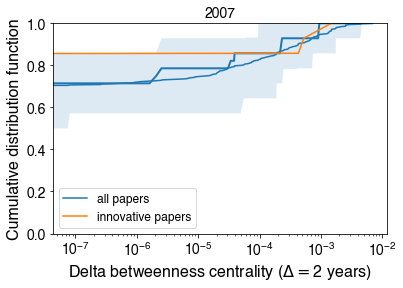

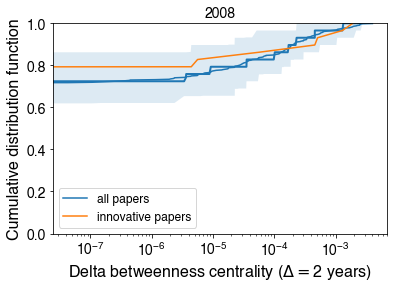

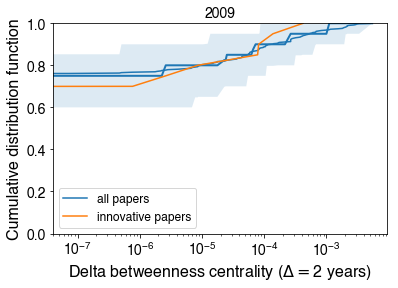

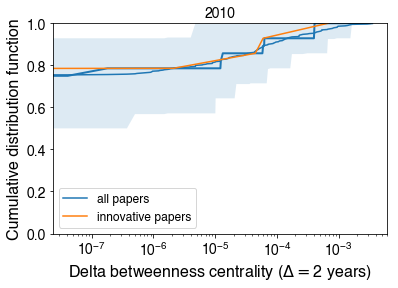

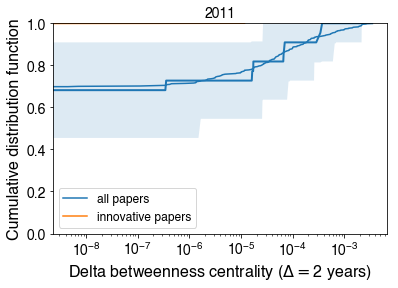

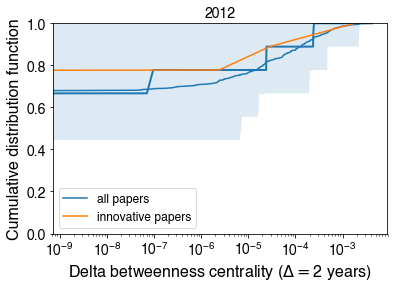

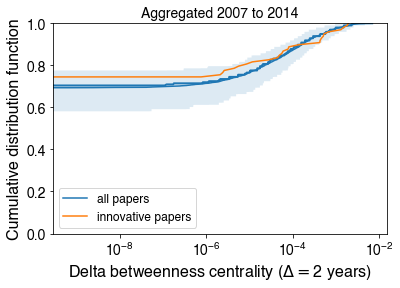

In [250]:
# 7.25.2018 distributions of "delta" betweenness (change in betweenness centrality)
deltaTimeBetweenness = 2 #1 #2 # years
# maxk = maximum number of nodes to test in measure of betweenness centrality
# maxk = 200 runs in ~2 minutes
# maxk = 400 runs in ~5 minutes
maxk = 400 #400 #200 #50 # 
aggregatedNewBwDelta,aggregatedInnovativeBwDelta = [],[]
xlabel = 'Delta betweenness centrality ($\\Delta=$'+str(deltaTimeBetweenness)+' years)'
for year in [2007,2008,2009,2010,2011,2012,2013,2014]:
    yearG = nx.from_pandas_adjacency(couplingByYear[year]>0)
    yearGPlus = nx.from_pandas_adjacency(couplingByYear[year + deltaTimeBetweenness]>0)
    bw = nx.betweenness_centrality(yearG,k=min(maxk,len(yearG)),normalized=True)
    bwPlus = nx.betweenness_centrality(yearGPlus,k=min(maxk,len(yearGPlus)),normalized=True)
    newIds = paperData[paperData['Year']==year].index
    bwNew = pd.Series([bw[idx] for idx in newIds],newIds)
    bwNewPlus = pd.Series([bwPlus[idx] for idx in newIds],newIds)
    bwNewDelta = bwNewPlus - bwNew
    print year,"number of new papers =",len(bwNew)
    innovativeBwDelta = bwNewDelta[innovativeIDsByYear[year]].dropna()
    aggregatedNewBwDelta.extend(bwNewDelta)
    aggregatedInnovativeBwDelta.extend(innovativeBwDelta)
    if len(innovativeBwDelta)>1:
        pylab.figure()
        cdfPlot(bwNewDelta,innovativeBwDelta)
        pylab.title(year)
        pylab.xlabel(xlabel)
        pylab.xscale('log')
    print year,"number of innovative papers =",len(innovativeBwDelta)
    
pylab.figure()
cdfPlot(aggregatedNewBwDelta,aggregatedInnovativeBwDelta)
pylab.title('Aggregated 2007 to 2014')
pylab.xlabel(xlabel)
pylab.xscale('log')

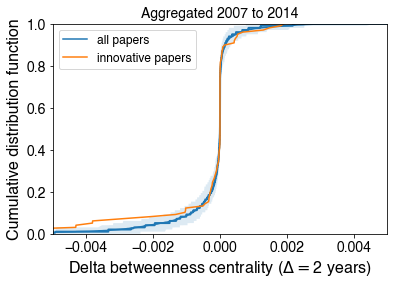

In [251]:
cdfPlot(aggregatedNewBwDelta,aggregatedInnovativeBwDelta,samples=100)
pylab.title('Aggregated 2007 to 2014')
pylab.xlabel(xlabel)
pylab.axis(xmin=-5e-3,xmax=5e-3)
#pylab.xscale('log')
pylab.savefig('180725_delta_betweenness_'+str(deltaTimeBetweenness)+'years_maxk'+str(maxk)\
              +'_numInnovative'+str(len(aggregatedInnovativeBwDelta))+'.pdf')

In [238]:
# test significance with 2 sample ks-test
print "numInnovative =",len(aggregatedInnovativeBwDelta)
print "deltaTimeBetweenness =",deltaTimeBetweenness
print "maxk =",maxk
print ks_2samp(aggregatedNewBwDelta,aggregatedInnovativeBwDelta)

numInnovative = 98
deltaTimeBetweenness = 2
maxk = 200
Ks_2sampResult(statistic=0.07349748410002299, pvalue=0.6610415669819771)


In [228]:
np.array(aggregatedNewBwDelta)>0

array([False, False, False, ..., False, False, False])

(array([9.48979592, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.51020408]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

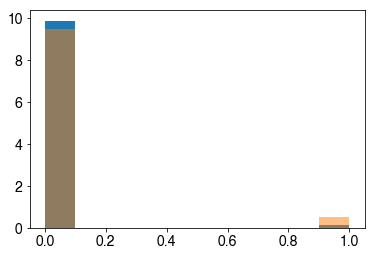

In [233]:
pylab.hist(np.array(aggregatedNewBwDelta)>0.002,normed=True)
pylab.hist(np.array(aggregatedInnovativeBwDelta)>0.002,normed=True,alpha=0.5)

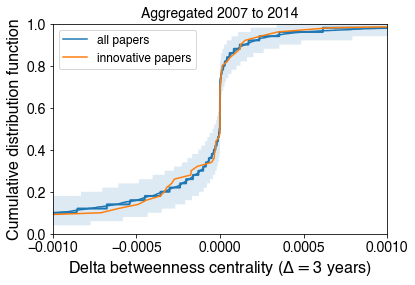

In [147]:
cdfPlot(aggregatedNewBwDelta,aggregatedInnovativeBwDelta,samples=1000)
pylab.title('Aggregated 2007 to 2014')
pylab.xlabel(xlabel)
pylab.axis(xmin=-1e-3,xmax=1e-3)
#pylab.xscale('log')
pylab.savefig('180725_delta_betweenness_'+str(deltaTimeBetweenness)+'years_maxk'+str(maxk)\
              +'_numInnovative'+str(len(aggregatedInnovativeBwDelta))+'.pdf')

In [137]:
from scipy.stats import ks_2samp

In [151]:
# test significance with 2 sample ks-test
print "numInnovative =",len(aggregatedInnovativeBwDelta)
print "deltaTimeBetweenness =",deltaTimeBetweenness
print "maxk =",maxk
print ks_2samp(aggregatedNewBwDelta,aggregatedInnovativeBwDelta)

numInnovative = 50
deltaTimeBetweenness = 2
maxk = 200
Ks_2sampResult(statistic=0.14746766791823107, pvalue=0.21350470563564478)


In [148]:
# test significance with 2 sample ks-test
print "numInnovative =",len(aggregatedInnovativeBwDelta)
print "deltaTimeBetweenness =",deltaTimeBetweenness
print "maxk =",maxk
print ks_2samp(aggregatedNewBwDelta,aggregatedInnovativeBwDelta)

numInnovative = 50
deltaTimeBetweenness = 3
maxk = 200
Ks_2sampResult(statistic=0.05731330830204423, pvalue=0.9959017737215929)


In [143]:
# test significance with 2 sample ks-test
print "numInnovative =",len(aggregatedInnovativeBwDelta)
print "deltaTimeBetweenness =",deltaTimeBetweenness
print "maxk =",maxk
print ks_2samp(aggregatedNewBwDelta,aggregatedInnovativeBwDelta)

numInnovative = 50
deltaTimeBetweenness = 2
maxk = 400
Ks_2sampResult(statistic=0.07670421360033375, pvalue=0.9228387426995879)


In [138]:
# test significance with 2 sample ks-test
print "numInnovative =",len(aggregatedInnovativeBwDelta)
print "deltaTimeBetweenness =",deltaTimeBetweenness
print "maxk =",maxk
print ks_2samp(aggregatedNewBwDelta,aggregatedInnovativeBwDelta)

numInnovative = 50
deltaTimeBetweenness = 2
maxk = 200
Ks_2sampResult(statistic=0.2210596579057154, pvalue=0.01314844148547341)


In [134]:
# testing: try with random sample of papers
randomBWDelta = np.random.choice(aggregatedNewBwDelta,len(aggregatedInnovativeBwDelta),replace=False)
ks_2samp(aggregatedNewBwDelta,randomBWDelta)

Ks_2sampResult(statistic=0.10659991656236961, pvalue=0.6030981062241607)

(-0.001, 0.001, 0.0, 2381.724751995813)

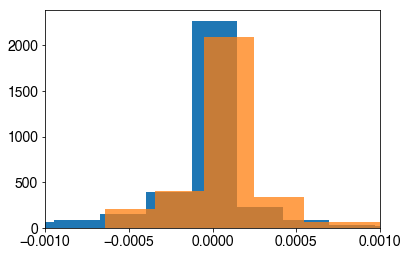

In [103]:
pylab.hist(aggregatedNewBwDelta,bins=100,normed=True)
pylab.hist(aggregatedInnovativeBwDelta,normed=True,bins=20,alpha=0.75);
pylab.axis(xmin=-1e-3,xmax=1e-3)

In [97]:
np.median(aggregatedNewBwDelta)

0.0

In [98]:
np.median(aggregatedInnovativeBwDelta)

3.5896404183913595e-06

In [100]:
np.percentile(aggregatedInnovativeBwDelta,[5,95])

array([-0.00041089,  0.0007423 ])

In [101]:
np.percentile(aggregatedNewBwDelta,[5,95])

array([-0.00164141,  0.00044619])

# 5.24.2018 use networkx's version of rich club coefficient

In [172]:
import networkx as nx
from toolbox.simplePickle import load,save
from toolbox.SparsenessTools import zeroDiag

In [145]:
G = nx.from_numpy_array(np.array(coupling)>0)

/Users/bryandaniels/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in greater
  """Entry point for launching an IPython kernel.


In [147]:
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 6456
Number of edges: 202535
Average degree:  62.7432


In [148]:
# takes ~30 minutes ? or load below
rcc = nx.rich_club_coefficient(G)
save(rcc,'180524_bibliographic_coupling_rich_club_coefficients.dat')

{0: 1.0,
 1: 1.0000939050669198,
 2: 1.0002425070277547,
 3: 1.0004960588127327,
 4: 1.0010595591636944,
 5: 1.0017419515847268,
 6: 1.0024892940322057,
 7: 1.003182455769898,
 8: 1.0037613914623988,
 9: 1.0047361401978634,
 10: 1.0057451927978631,
 11: 1.0065530463986403,
 12: 1.0078968922406466,
 13: 1.0089242243745793,
 14: 1.0104399157297512,
 15: 1.011384065453135,
 16: 1.0125194216943616,
 17: 1.0137193910264903,
 18: 1.0149659139326799,
 19: 1.0158557554785386,
 20: 1.0169695076634748,
 21: 1.0184943712783066,
 22: 1.0198597939047014,
 23: 1.0212528766715048,
 24: 1.022853620202267,
 25: 1.024086220960767,
 26: 1.025706810701325,
 27: 1.0274978592613175,
 28: 1.0292354166189899,
 29: 1.0312341465664345,
 30: 1.0334595408836855,
 31: 1.0362966396563964,
 32: 1.038146865135196,
 33: 1.0396752168296732,
 34: 1.0417201925732056,
 35: 1.0441949789172682,
 36: 1.046368229810245,
 37: 1.0480840963038318,
 38: 1.0499626400996263,
 39: 1.0518800062823936,
 40: 1.0531479967293542,
 41: 1.

In [168]:
rcc = load('180524_bibliographic_coupling_rich_club_coefficients.dat')

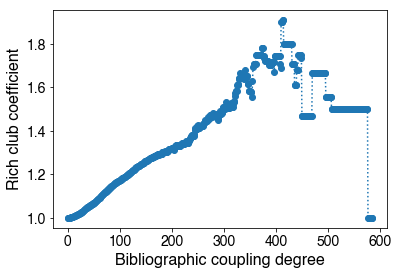

In [153]:
sortedDegrees = np.sort(rcc.keys())
pylab.plot(sortedDegrees,[rcc[d] for d in sortedDegrees],'o:')
pylab.xlabel('Bibliographic coupling degree')
pylab.ylabel('Rich club coefficient')

In [157]:
sortedDegrees = np.sort(rcc.keys())
maxindex = np.argmax([rcc[d] for d in sortedDegrees])
print "Maximum rich club coefficient of",rcc[sortedDegrees[maxindex]],"occurs at degree",sortedDegrees[maxindex]

Maximum rich club coefficient of 1.90909090909 occurs at degree 413


In [165]:
len(richClubNodes(degrees(coupling),413))

17

In [245]:
# also explicitly test on shuffled network
# (networkx won't calculate rich club coefficient with self-loops, so remove them)
Gshuffled = nx.from_numpy_array(np.array(zeroDiag(couplingShuffled)>0))

/Users/bryandaniels/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in greater
  This is separate from the ipykernel package so we can avoid doing imports until


In [249]:
rccShuffledNew = nx.rich_club_coefficient(Gshuffled)

ZeroDivisionError: float division by zero

In [248]:
sortedDegreesShuffled = np.sort(rccShuffledNew.keys())
pylab.plot(sortedDegreesShuffled,[rccShuffledNew[d] for d in sortedDegreesShuffled],'o:',color='orange')
pylab.xlabel('Bibliographic coupling degree')
pylab.ylabel('Rich club coefficient')

NameError: name 'rccShuffledNew' is not defined

/Users/bryandaniels/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in greater
  


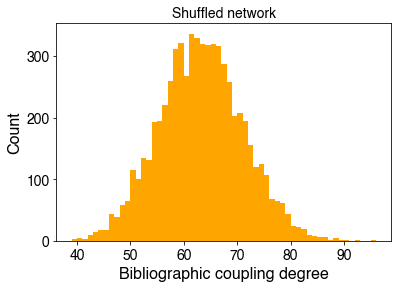

In [244]:
d = degrees(couplingShuffled)
pylab.hist(d,bins=max(d)-min(d),log=False,color='orange');
pylab.xlabel('Bibliographic coupling degree')
pylab.ylabel('Count')
#pylab.xscale('log')
pylab.title('Shuffled network')

# compare bibliographic degree distributions combined over all years (old as of 7.25.2018)

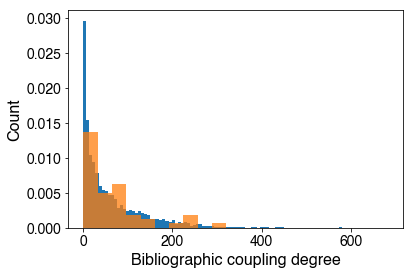

In [27]:
deg = degrees(coupling)
degInnovative = deg[innovativeIDs]
histFull,binEdgesFull,_ = pylab.hist(deg,bins=100,log=False,normed=True);
histInnovative,binEdgesInnovative,_ = pylab.hist(degInnovative,normed=True,alpha=0.75)
pylab.xlabel('Bibliographic coupling degree')
pylab.ylabel('Count')
#pylab.xscale('log')

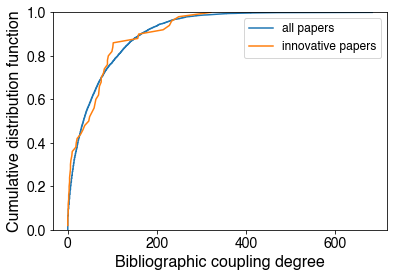

In [523]:
# might be easiest to compare the cdfs

sortedDegrees = np.sort(deg)
Fdegrees = (np.array(range(len(sortedDegrees)))+1)/float(len(sortedDegrees))

sortedDegreesInnovative = np.sort(degInnovative)
FdegreesInnovative = (np.array(range(len(sortedDegreesInnovative)))+1)/float(len(sortedDegreesInnovative))

pylab.plot(sortedDegrees,Fdegrees,label='all papers')
pylab.plot(sortedDegreesInnovative,FdegreesInnovative,label='innovative papers')
pylab.legend()
pylab.axis(ymin=0,ymax=1)
pylab.xlabel('Bibliographic coupling degree')
pylab.ylabel('Cumulative distribution function')

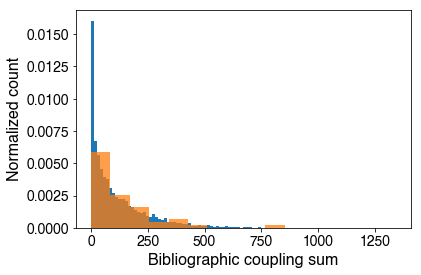

In [524]:
cs = couplingSum(coupling)
csInnovative = cs[innovativeIDs]
histFull,binEdgesFull,_ = pylab.hist(cs,bins=100,log=False,normed=True);
histInnovative,binEdgesInnovative,_ = pylab.hist(csInnovative,normed=True,alpha=0.75)
pylab.xlabel('Bibliographic coupling sum')
pylab.ylabel('Normalized count')
#pylab.xscale('log')

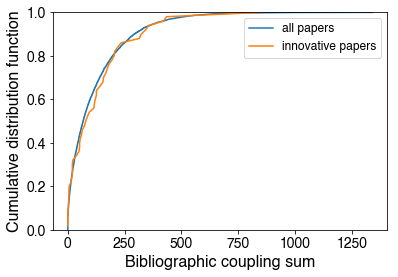

In [525]:
cdfPlot(cs,csInnovative)
pylab.xlabel('Bibliographic coupling sum')

# 5.24.2018 calculate rich club coefficient as a function of degree (old)

In [74]:
sortedDegrees = np.unique(degrees(coupling))

In [232]:
sortedDegrees = [1,5,10,20,100,200,400,500]

In [134]:
rhos = []
degreeList = degrees(coupling)
for degree in sortedDegrees:
    rhos.append(rho_unc(coupling,degree,degreeList))

Nrich,meanKrich = 6041.0 67.05346796887932
N,meanK = 6456 62.7431846344
Nrich,meanKrich = 5403.0 74.49194891726819
N,meanK = 6456 62.7431846344
Nrich,meanKrich = 4840.0 81.87644628099173
N,meanK = 6456 62.7431846344
Nrich,meanKrich = 4067.0 93.259404966806
N,meanK = 6456 62.7431846344
Nrich,meanKrich = 1492.0 129.01608579088472
N,meanK = 6456 62.7431846344
Nrich,meanKrich = 407.0 89.14004914004914
N,meanK = 6456 62.7431846344
Nrich,meanKrich = 21.0 15.619047619047619
N,meanK = 6456 62.7431846344
Nrich,meanKrich = 6.0 4.666666666666667
N,meanK = 6456 62.7431846344


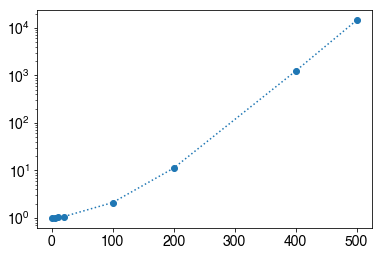

In [135]:
pylab.plot(sortedDegrees,rhos,'o:')
pylab.yscale('log')

In [ ]:
# check that shuffled version of network doesn't have strong rich club

In [183]:
from toolbox.SparsenessTools import shuffle,aboveDiagFlat

In [218]:
#couplingShuffled = np.transpose(shuffle(np.transpose(shuffle(np.array(coupling)))))
couplingFlatShuffled = shuffle(aboveDiagFlat(coupling))
couplingShuffled = np.nan*np.zeros_like(coupling)
couplingShuffled[np.triu_indices_from(couplingShuffled,k=1)] = couplingFlatShuffled
couplingShuffled[np.triu_indices_from(couplingShuffled,k=1)[::-1]] = couplingFlatShuffled

In [230]:
np.sum(np.nan_to_num(couplingShuffled)),np.sum(np.nan_to_num(coupling))

(744904.0, 744904.0)

In [233]:
rhosShuffled = []
degreeListShuffled = degrees(couplingShuffled)
for degree in sortedDegrees:
    rhosShuffled.append(rho_unc(couplingShuffled,degree,degreeListShuffled))

/Users/bryandaniels/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in greater
  


Nrich,meanKrich = 6456.0 62.743184634448575
N,meanK = 6456 62.743184634448575
Nrich,meanKrich = 6456.0 62.743184634448575
N,meanK = 6456 62.743184634448575
Nrich,meanKrich = 6456.0 62.743184634448575
N,meanK = 6456 62.743184634448575
Nrich,meanKrich = 6456.0 62.743184634448575
N,meanK = 6456 62.743184634448575


/Users/bryandaniels/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in divide
  import sys


Nrich,meanKrich = 0.0 nan
N,meanK = 6456 62.743184634448575
Nrich,meanKrich = 0.0 nan
N,meanK = 6456 62.743184634448575
Nrich,meanKrich = 0.0 nan
N,meanK = 6456 62.743184634448575
Nrich,meanKrich = 0.0 nan
N,meanK = 6456 62.743184634448575


In [234]:
rhosShuffled

[1.0, 1.0, 1.0, 1.0, nan, nan, nan, nan]

In [141]:
rhos

[1.0000000000000004,
 1.0064351023653348,
 1.022176127101408,
 1.0679803631033047,
 2.104347193649606,
 11.16510474090408,
 1234.969512195122,
 14466.785714285714]

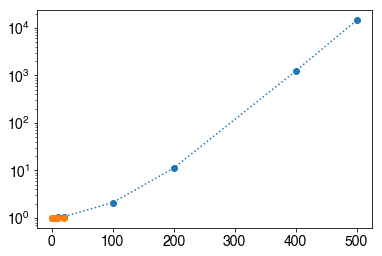

In [235]:
pylab.plot(sortedDegrees,rhos,'o:')
pylab.plot(sortedDegrees,rhosShuffled,'o:')
pylab.yscale('log')

In [ ]:
# uhh.... I think there's something wrong here.  why don't we just try networkx's version